In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Caminhos e Nomes ---

# O arquivo CSV que geramos no notebook anterior
CSV_PATH = '../database/features.csv'

# Onde salvar o gráfico
OUTPUT_IMAGE = 'out/scatterplot_matrix.png'

# --- Configurações de Plotagem ---

# 1. Lista das features que queremos plotar
features_para_plotar = [
    'Ventricle_Area',
    'Ventricle_Perimeter',
    'Ventricle_Circularity',
    'Ventricle_Eccentricity',
    'Ventricle_Solidity',
    'Ventricle_MajorAxisLength'
]

# 2. Mapeamento de Cores
# A coluna no CSV se chama 'Group'
cor_map = {
    'Nondemented': 'blue',
    'Demented': 'red',
    'Converted': 'black'
}

# 3. Configura o estilo do seaborn
sns.set(style="ticks")

print("Célula 1 executada: Bibliotecas importadas, caminhos e mapa de cores definidos.")

Célula 1 executada: Bibliotecas importadas, caminhos e mapa de cores definidos.


In [6]:
print("Carregando e preparando os dados da planilha...")

try:
    # Carrega a planilha completa
    df_full = pd.read_csv(CSV_PATH, sep=';', decimal=',')
    print(f"Planilha completa carregada: {df_full.shape[0]} linhas.")

    # --- ETAPA CRÍTICA ---
    # Filtra o DataFrame, mantendo apenas as linhas onde 
    # as features dos ventrículos foram calculadas (sem NaNs).
    df_plot = df_full.dropna(subset=features_para_plotar)
    
    # Também vamos remover as visitas onde o 'Group' não foi definido
    df_plot = df_plot.dropna(subset=['Group'])

    print(f"Dados prontos para plotagem: {df_plot.shape[0]} linhas com features válidas.")
    
    if df_plot.shape[0] == 0:
        print("\nERRO: Nenhuma linha com dados de features foi encontrada.")
        print("Verifique se o merge na Célula 5 do 'feature_extraction.ipynb' funcionou.")
    else:
        print("\nContagem de classes que serão plotadas:")
        print(df_plot['Group'].value_counts())

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em {CSV_PATH}")
    print("Execute o notebook 'feature_extraction.ipynb' primeiro.")
except Exception as e:
    print(f"ERRO ao carregar os dados: {e}")

Carregando e preparando os dados da planilha...
Planilha completa carregada: 373 linhas.
Dados prontos para plotagem: 373 linhas com features válidas.

Contagem de classes que serão plotadas:
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


Gerando a matriz de scatterplots (Pairplot)...

Gráfico salvo com sucesso em: out/scatterplot_matrix.png


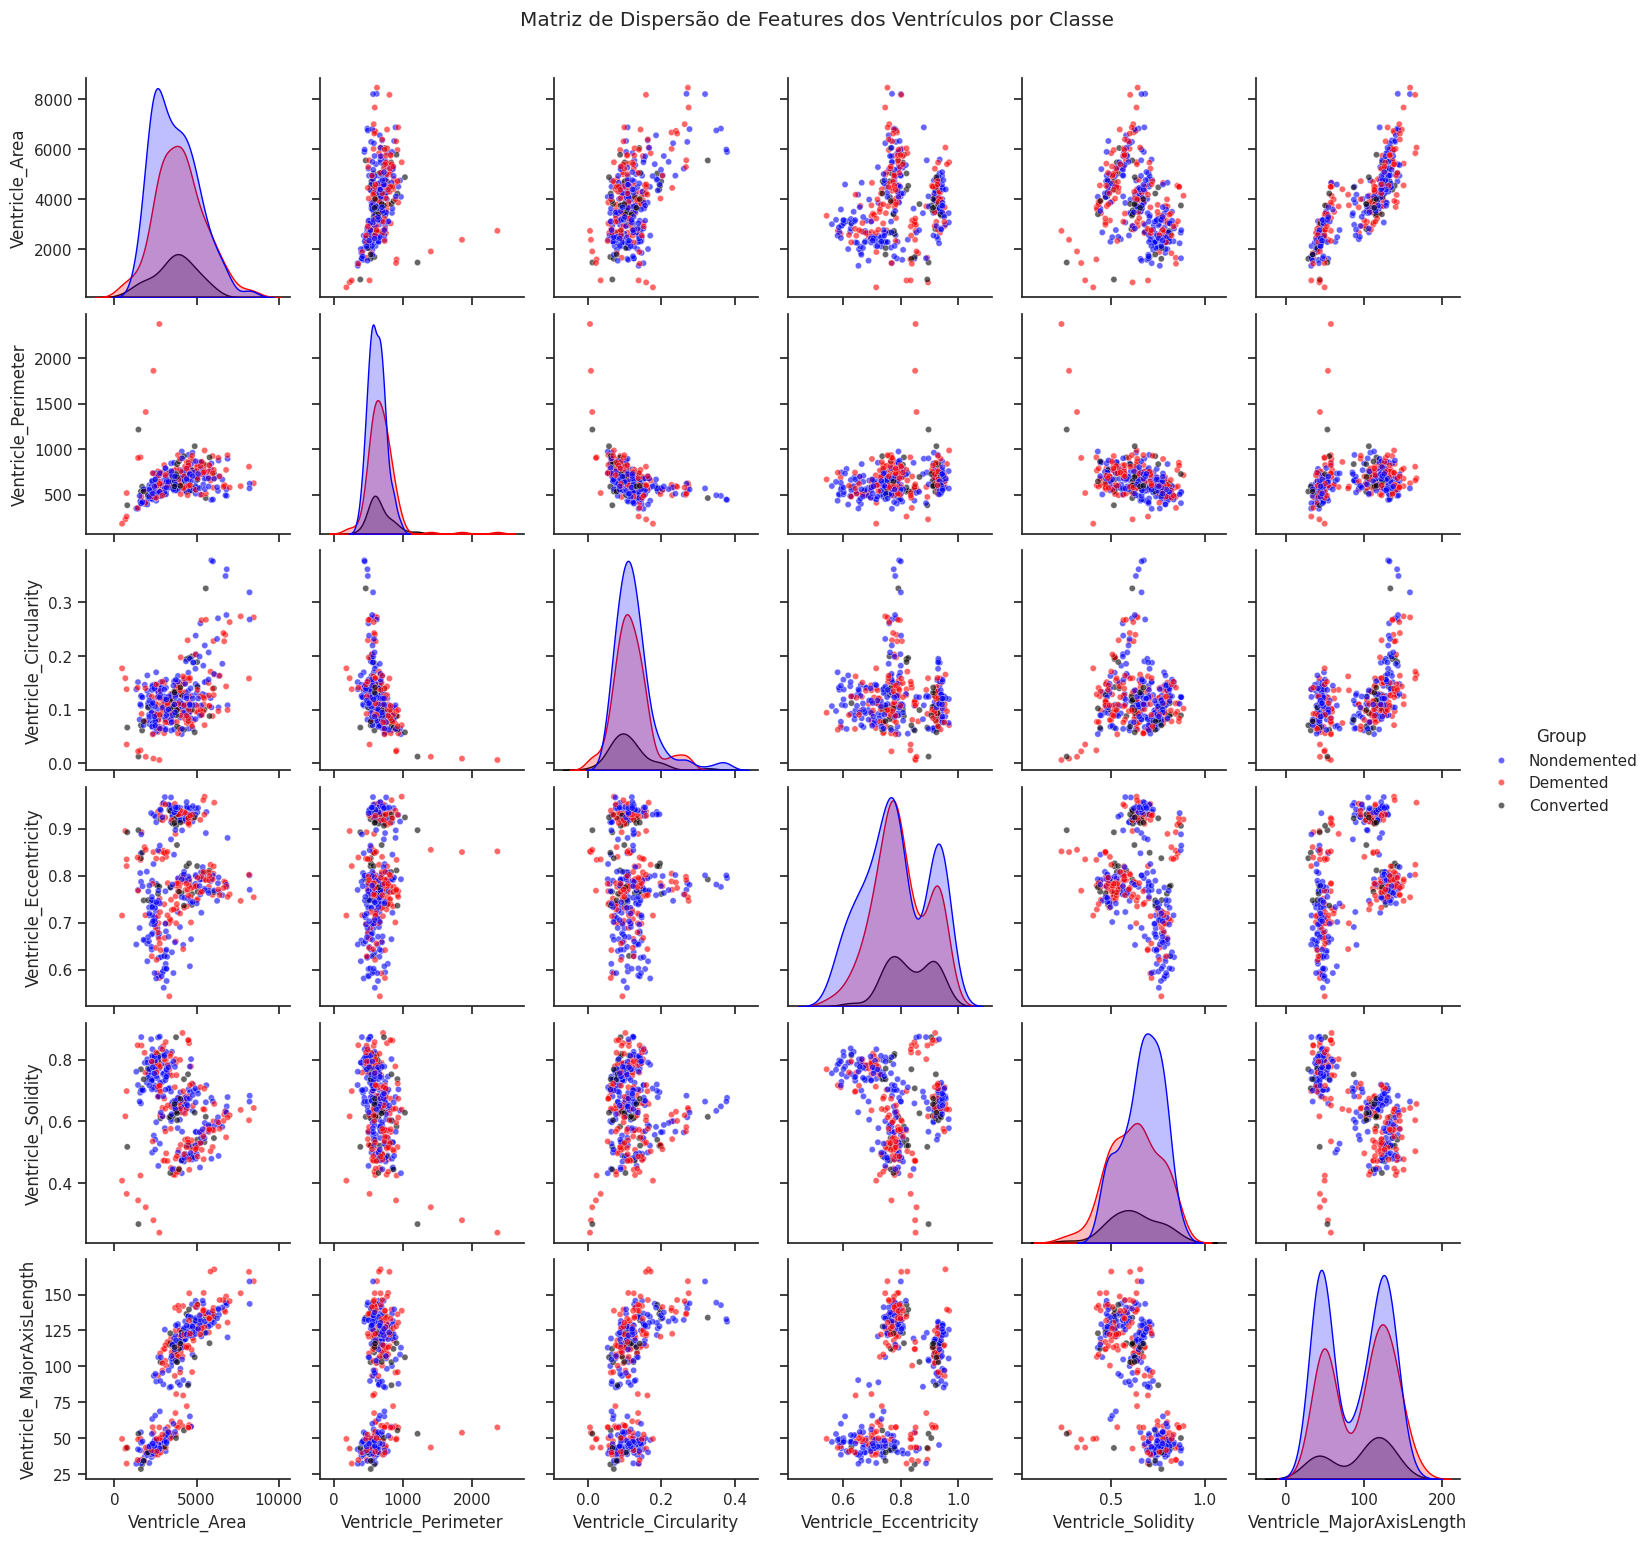

In [7]:
if 'df_plot' in locals() and not df_plot.empty:
    print("Gerando a matriz de scatterplots (Pairplot)...")
    
    # 1. Cria a grade de gráficos
    # 'vars' define quais colunas usar (nossas 6 features)
    # 'hue' define qual coluna usar para a cor ('Group')
    # 'palette' usa nosso mapa de cores customizado
    # 'diag_kind='kde'' plota uma estimativa de densidade na diagonal
    g = sns.pairplot(
        df_plot,
        vars=features_para_plotar,
        hue='Group',
        palette=cor_map,
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 's': 20} # Deixa os pontos menores e translúcidos
    )

    # 2. Adiciona um título geral
    g.fig.suptitle("Matriz de Dispersão de Features dos Ventrículos por Classe", y=1.03)

    # 3. Salva a imagem
    try:
        g.savefig(OUTPUT_IMAGE)
        print(f"\nGráfico salvo com sucesso em: {OUTPUT_IMAGE}")
    except Exception as e:
        print(f"\nErro ao salvar o gráfico: {e}")

    # 4. Mostra o gráfico no notebook
    plt.show()

else:
    print("\nERRO: DataFrame 'df_plot' está vazio ou não definido. Célula 2 falhou.")